# Concrete Strength Prediction

#### Objective 

To predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain a score above 85%.


Name	Data Type	Measurement	Description
1.	Cement (cement)	quantitative	kg in a m3 mixture	Input Variable
2.	Blast Furnace Slag (slag)	quantitative	kg in a m3 mixture	Input Variable
3.	Fly Ash (ash)	quantitative	kg in a m3 mixture	Input Variable
4.	Water(water)	quantitative	kg in a m3 mixture	Input Variable
5.	Superplasticizer (superplastic)	quantitative	kg in a m3 mixture	Input Variable
6.	Coarse Aggregate (coarseagg)	quantitative	kg in a m3 mixture	Input Variable
7.	Fine Aggregate (fineagg)	quantitative	kg in a m3 mixture	Input Variable
8.	Age(age)	quantitative	Day (1~365)	Input Variable
9.	Concrete compressive strength(strength)	quantitative	MPa	Output Variable


In [150]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Split Train/Test data 70:30 ratio
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures


%matplotlib inline
warnings.filterwarnings("ignore") 
df = pd.read_csv('concrete.csv')
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


## 1. Univariate analysis
data types and description of the independent attributes which should include (name, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions/tails, missing values, outliers, duplicates

In [39]:
df.shape

(1030, 9)

In [81]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [83]:
df.isnull().apply(pd.value_counts)  

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
False,1030,1030,1030,1030,1030,1030,1030,1030,1030


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [85]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


### Insight
0 values may indicate that the mixture does not have that material so we do not eliminate or impute those values


In [84]:
df.nunique()

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

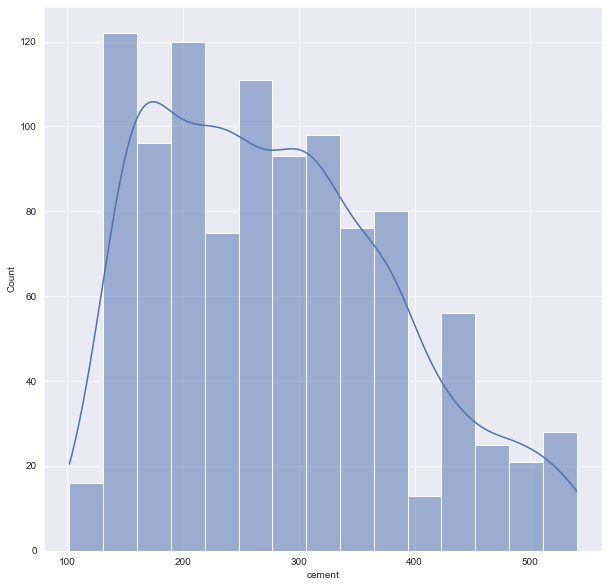

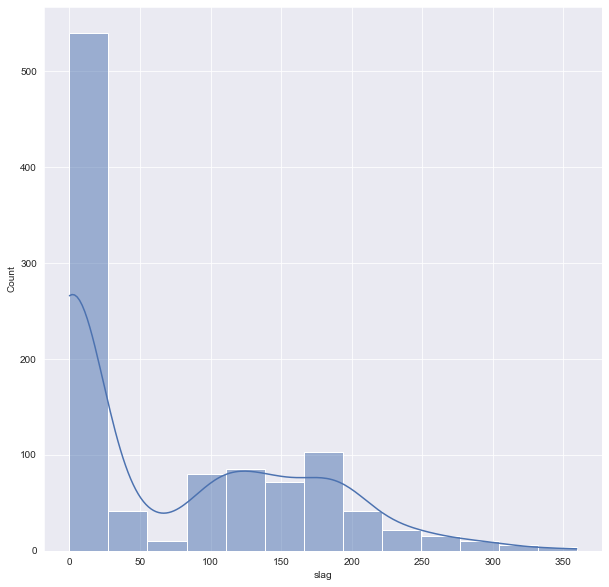

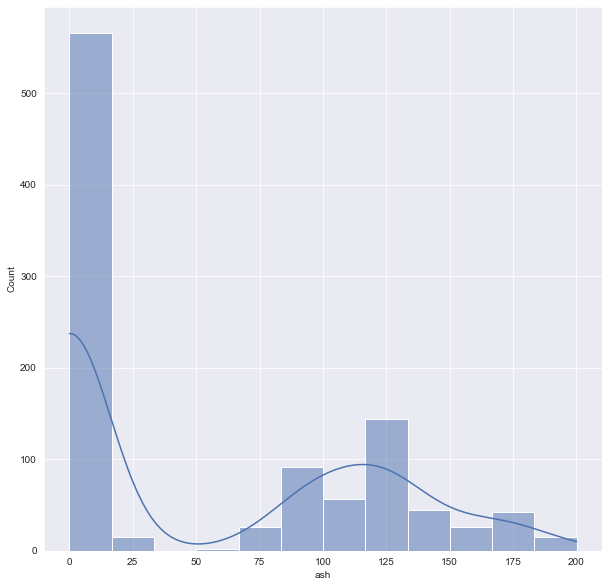

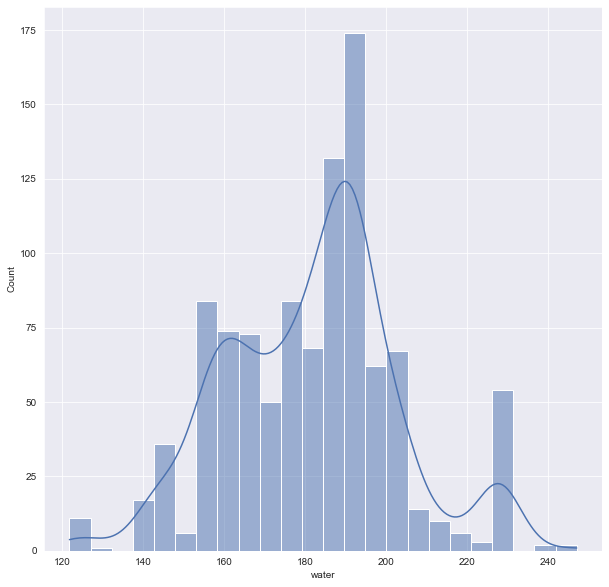

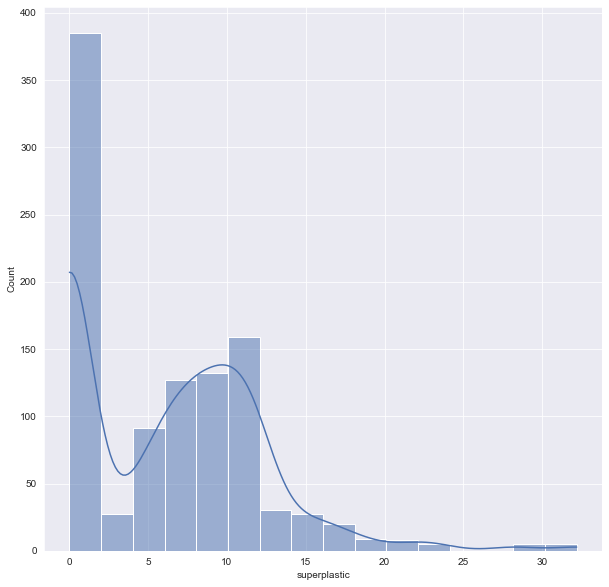

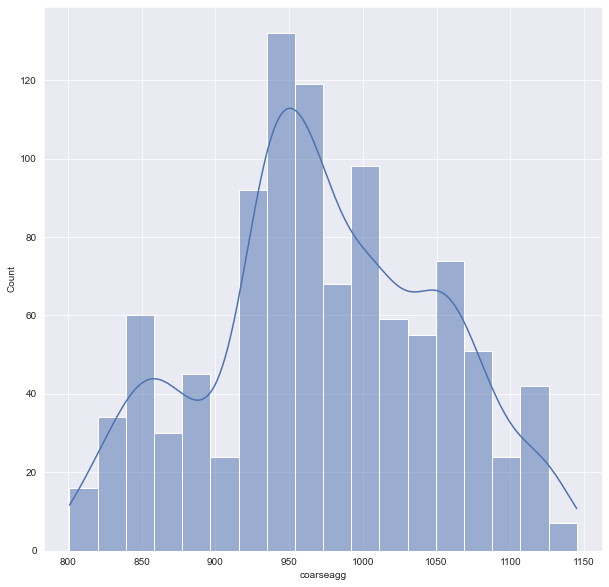

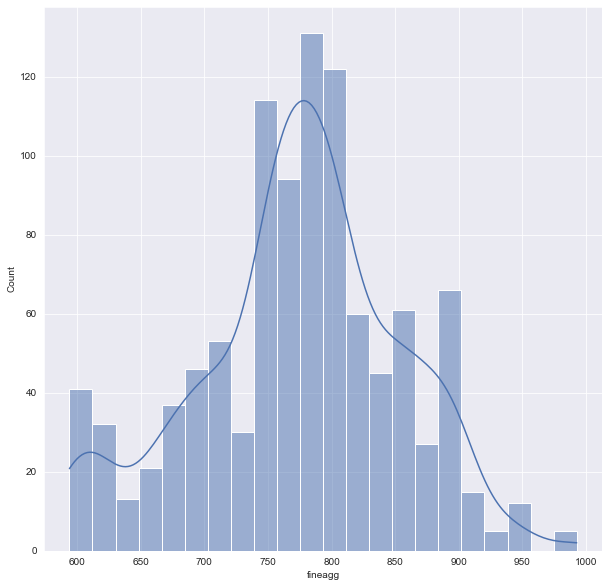

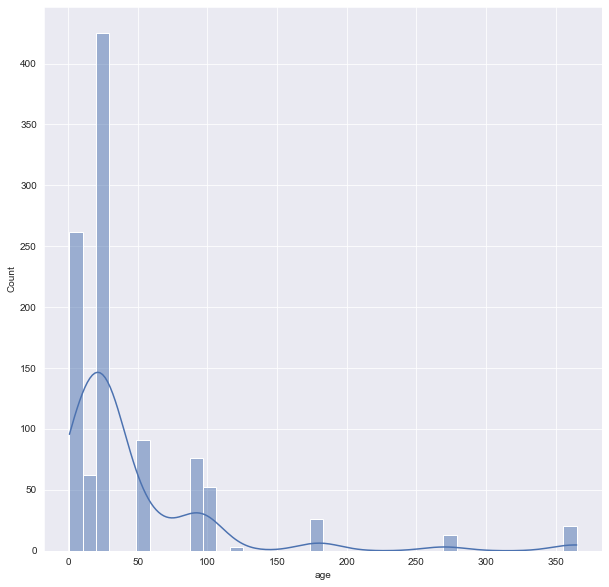

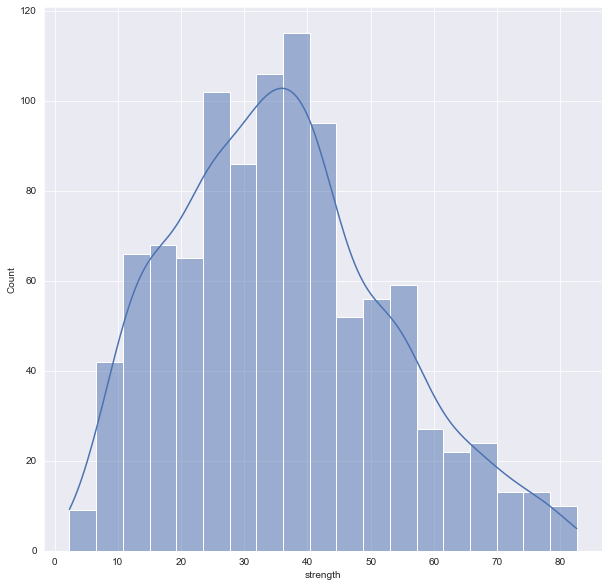

In [52]:
for i in df.columns:
    sns.set({'figure.figsize': (10,10)})
    sns.histplot(df[i], kde=True)
    plt.show()

### Insight: 
There is some components with 0 values. We can attribute them just as a 0 values, because some mix does not have any of them. 

## 2. Bi-variate 
analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms, or density curves. 

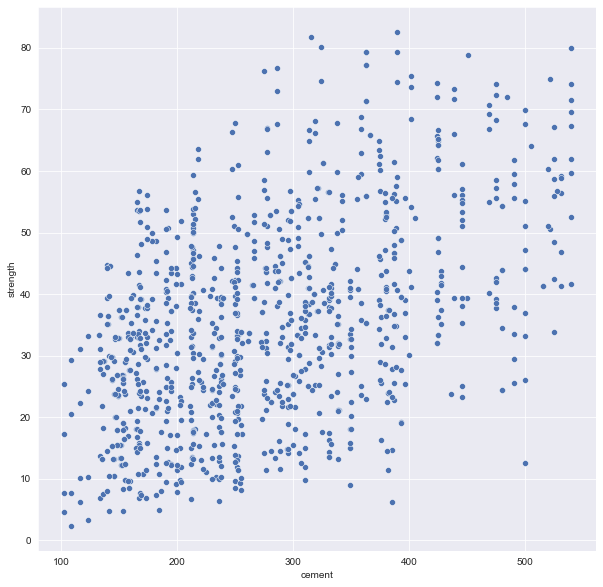

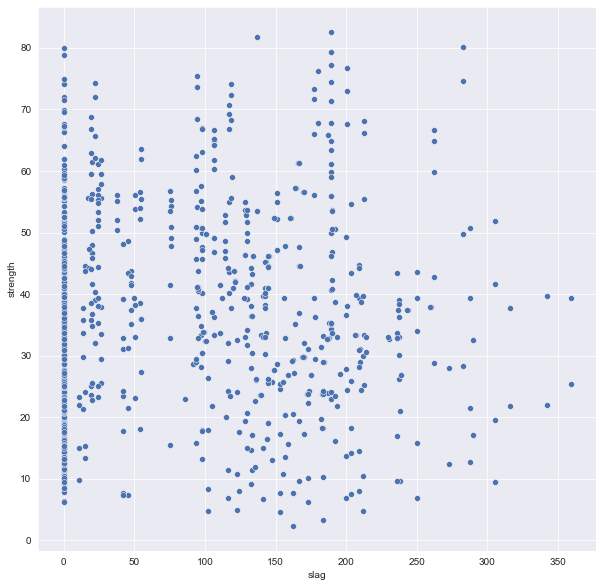

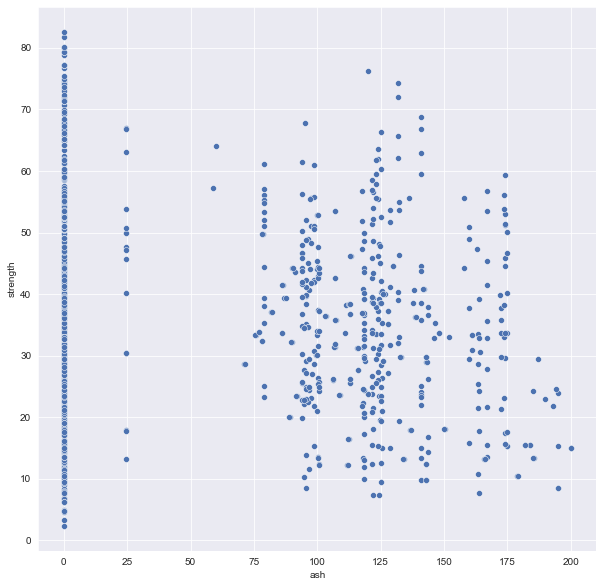

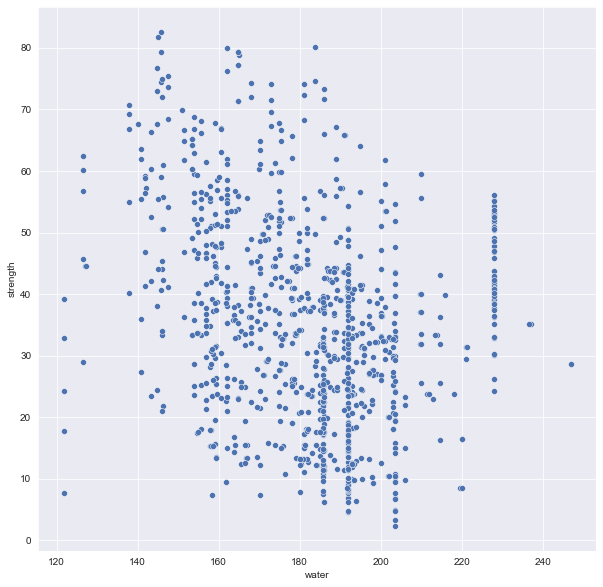

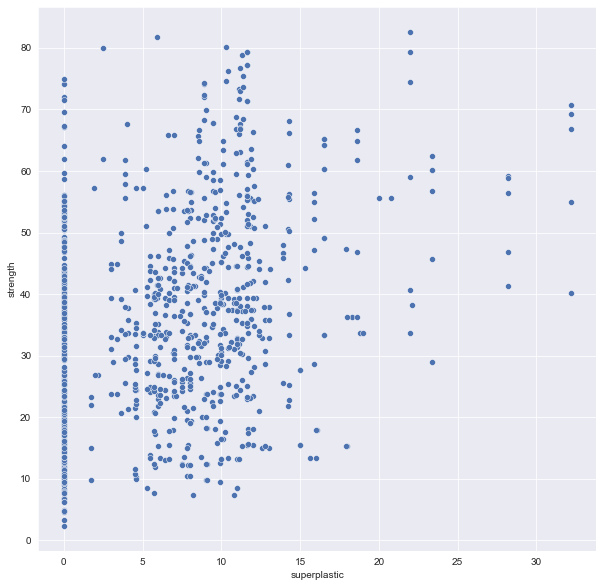

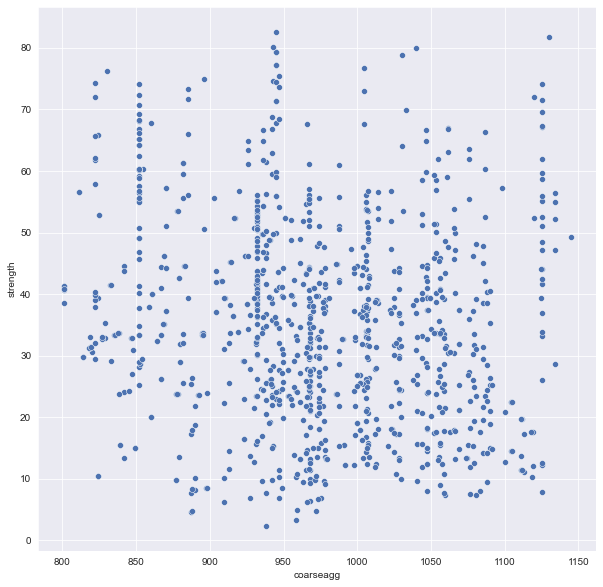

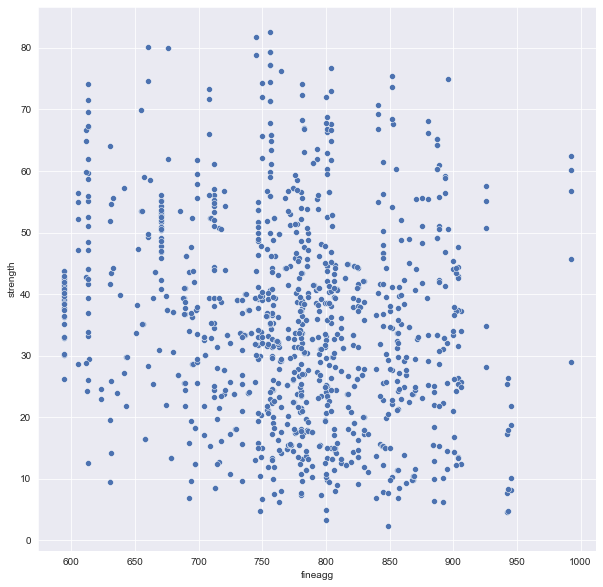

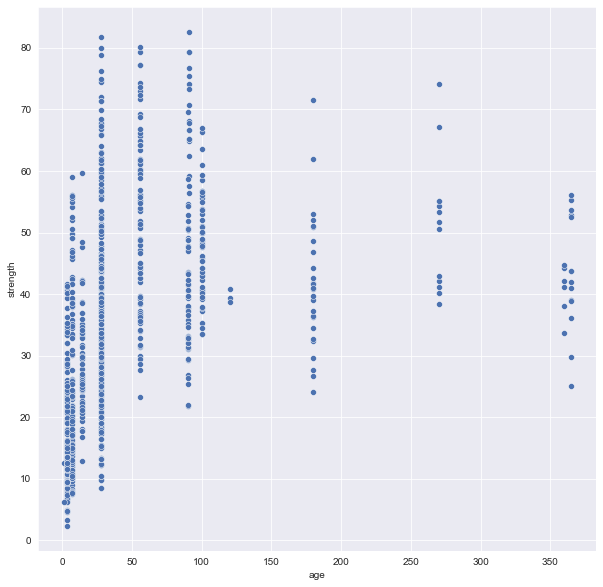

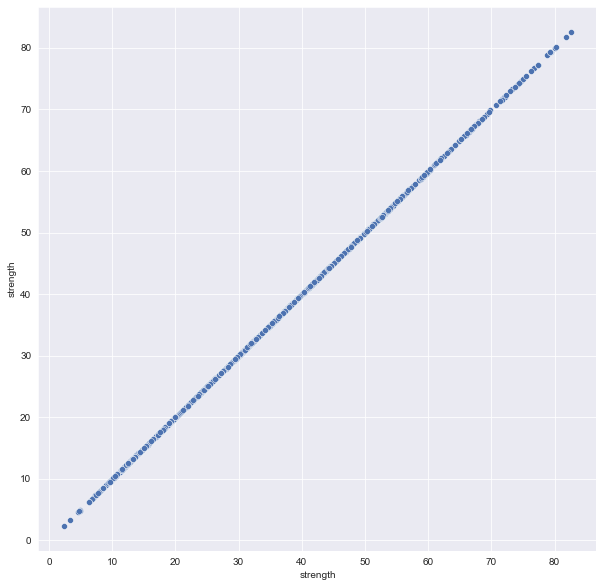

In [53]:
for i in df.columns:
    plt.figure(figsize = (10,10))
    sns.scatterplot(x = df[i], y = df['strength'])
    plt.show()  

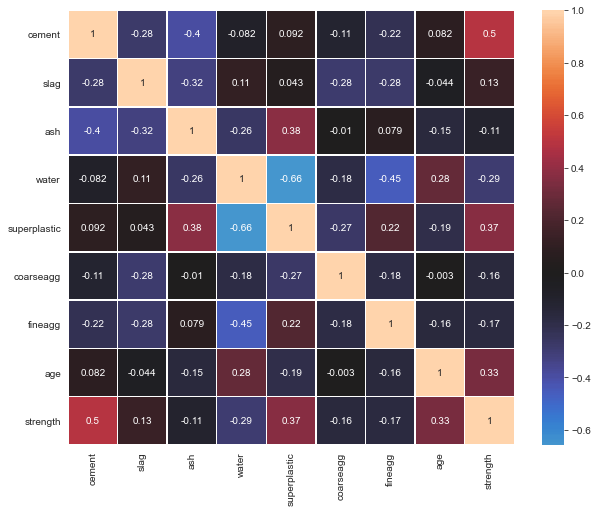

In [76]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0)
plt.show()

In [77]:
cor = df.corr()
cor

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


### Insigth
There are three variable with more corr with strength.

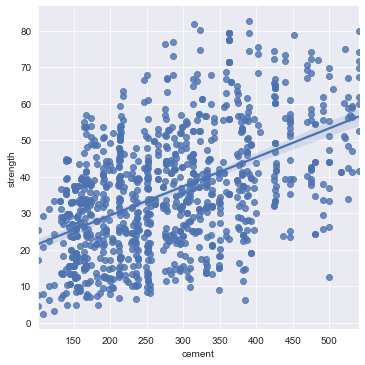

In [60]:
sns.lmplot(x="cement", y="strength", data=df)

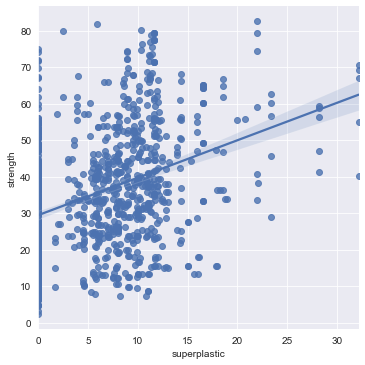

In [61]:
sns.lmplot(x="superplastic", y="strength", data=df)

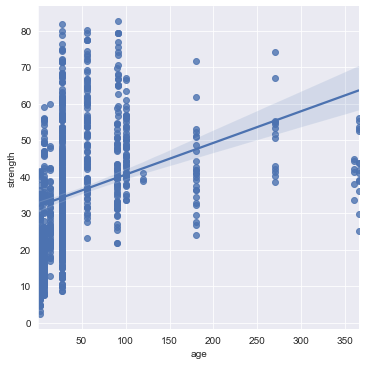

In [112]:
sns.lmplot(x="age", y="strength", data=df)

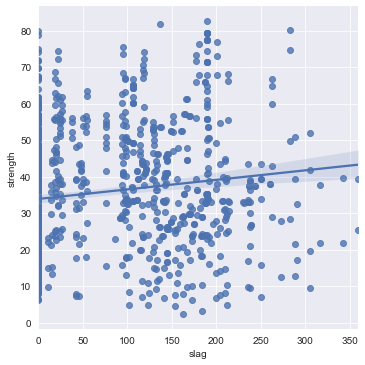

In [113]:
sns.lmplot(x="slag", y="strength", data=df)

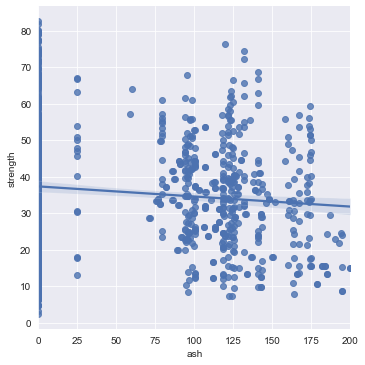

In [114]:
sns.lmplot(x="ash", y="strength", data=df)

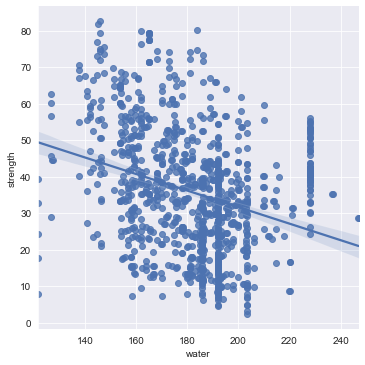

In [115]:
sns.lmplot(x="water", y="strength", data=df)

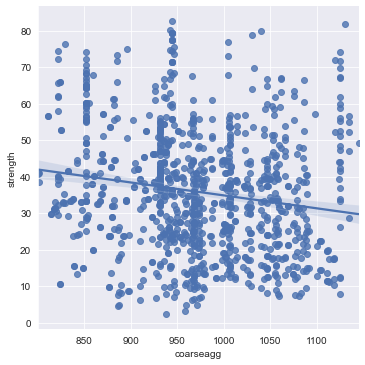

In [117]:
sns.lmplot(x="coarseagg", y="strength", data=df)

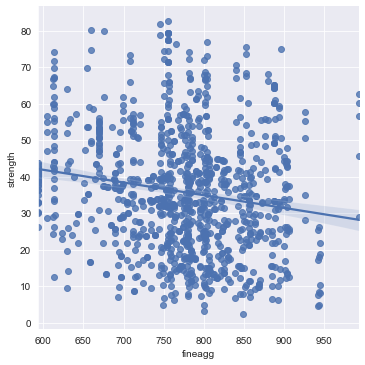

In [118]:
sns.lmplot(x="fineagg", y="strength", data=df)

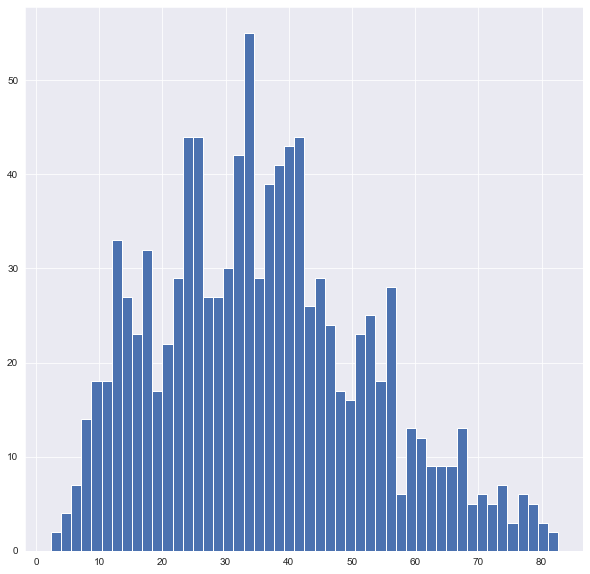

In [59]:
plt.hist(df['strength'], bins= 50) 
plt.show()

### Model using Lineal Regression

In [188]:
X = df.loc[:, df.columns != 'strength']
Y = df['strength']

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

In [190]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [191]:
print(regression_model.score(X_train, y_train))

0.603148754063023


In [192]:
print(regression_model.score(X_test, y_test))

0.6339136715208276


In [110]:
coeff_data = pd.DataFrame()
coeff_data['Feature'] = X_train.columns
coeff_data['Coefs'] = regression_model.coef_
coeff_data.sort_values(by='Coefs',ascending=False)
coeff_data

,Feature,Coefs
0,cement,0.126558
1,slag,0.108828
2,ash,0.090705
3,water,-0.103157
4,superplastic,0.376123
5,coarseagg,0.024029
6,fineagg,0.036193
7,age,0.110435


## 3. Feature Engineering techniques


### Apply Ridge, Lasso, Polynomial models

In [193]:
# It created a new dataset to apply Ridge and Lasso. (fe: Feature Engineering)
X_fe = df.loc[:, df.columns != 'strength']
Y_fe = df['strength']

In [194]:
# Applying processing to standardize the dataset
# https://scikit-learn.org/stable/modules/preprocessing.html
X_scaled = preprocessing.scale(X_fe)
X_scaled = pd.DataFrame(X_scaled, columns=X_fe.columns) 

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_fe, test_size=0.30, random_state=1)

In [196]:
regression_model_fe = LinearRegression()
regression_model_fe.fit(X_train, y_train)

LinearRegression()

In [197]:
print(regression_model_fe.score(X_train, y_train))
print(regression_model_fe.score(X_test, y_test))

0.603148754063023
0.6339136715208273


### Insight
    

### Ridge
#### https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [198]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [13.13304305  9.3000219   5.72584423 -2.25989005  2.24591427  1.80860507
  2.82495919  6.96518176]


In [199]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.603144790939098
0.6340333563625518


### Insight

### Lasso
#### https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [200]:
lasso = Lasso(alpha=0.2)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 9.88386215  6.06745038  2.74449272 -4.09551238  2.39665909 -0.07157679
  0.          6.50630423]


In [201]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.5965170060724401
0.6324397017469259


### Insight

### Polynomial models
#### https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [203]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)

In [204]:
X_poly = poly.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(721, 37)

In [213]:
regression_model_fe.fit(X_train, y_train)
print(regression_model_fe.coef_)

[ 5.02512283e-17  1.34777181e+01  1.01453909e+01  6.05814040e+00
 -1.56595255e+00  4.25130927e+00  1.23634849e+00  2.53761032e+00
  1.49772131e+01  7.59594704e-01  1.15681909e+00 -3.90120685e+00
 -1.73806869e+00  3.29193411e-01  6.17368282e-01  2.91053268e+00
  1.76307429e+00 -1.63204600e+00  5.21667573e-01  3.68167194e-01
  2.08128646e+00  4.26397239e+00 -2.31745785e+00 -2.32994460e+00
  2.58685837e-01  1.97858614e+00  6.75668908e+00  1.96653055e+00
 -1.09589014e+00 -3.09952083e-01 -9.61638886e-01  1.77590106e+00
  9.90577456e-01  2.40653442e+00  1.63052044e+00 -3.01539427e-01
  1.84973490e+00]


In [214]:
print(regression_model_fe.score(X_train, y_train))
print(regression_model_fe.score(X_test, y_test))

0.7549578268848259
0.7444710081439015


In [208]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [ 0.         13.3230364   9.98806788  5.92007287 -1.6769773   4.24346992
  1.14709561  2.40295661 14.94433259  0.75048865  1.15780428 -3.8556977
 -1.72087746  0.33506201  0.61718292  2.7638557   1.74523077 -1.60892884
  0.5291864   0.35781419  2.0722416   4.15030544 -2.26730837 -2.32755965
  0.26752031  1.98410524  6.6046349   1.97079137 -1.07823346 -0.3095362
 -1.03929564  1.77010082  0.98752549  2.43497624  1.63032432 -0.31792245
  1.73711233]


In [209]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.7549463250929687
0.7444379607063952


In [210]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.         10.38313413  6.71312204  2.90652138 -3.50322958  4.12879395
 -0.32930571  0.06610979 14.02555421  0.17923259  0.36709735 -1.76710531
 -1.08871369  0.0347827   0.37560336  0.          0.55217495 -0.
  0.88663059  0.          1.71890796  1.95781634 -0.28994533 -1.90371728
  0.          1.57752701  3.75047916  1.56988075 -0.57750007 -0.
 -1.48067583  1.63519198  0.59397392  3.46275015  1.39309712 -0.
 -0.        ]


In [211]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.74559141484304
0.733065231809324


# Creating the Model and Tuning It
- Algorithms that you think will be suitable for this project. Use Kfold Cross-Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (at least 3 algorithms, one bagging and one boosting based algorithms have to be there)
- Techniques employed to squeeze that extra performance out of the model without making it overfit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (15 marks)